### Problem 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import *
import pylab
import scipy 
from scipy.special import comb
import math
class Rule30(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 30.
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 1,
        (0, 1, 0): 1,
        (0, 1, 1): 1,
        (1, 0, 0): 1,
        (1, 0, 1): 0,
        (1, 1, 0): 0,
        (1, 1, 1): 0}

    def __init__(self, length=15, density=0.4):
        '''
        Initialize Rule30 objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton.
           In our case that is 15.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.length = length
        self.density = density

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        indices = [2,4,6,8,10,12] # indices where black cells are
        for i in indices:
          self.current_state[i]=1 # update them in the zeros array
        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        plt.figure()  # Create a new figure
        plt.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = plt.cm.binary)
        plt.axis('image')
        plt.title( 't = ' + str(self.time))
        plt.show()

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(1, self.length - 1):
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1

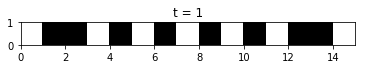

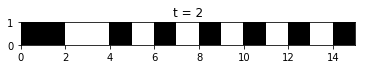

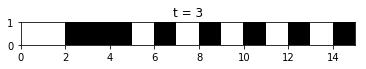

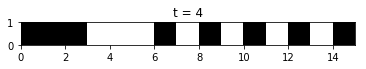

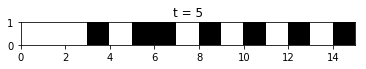

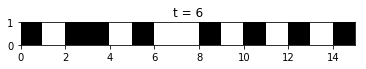

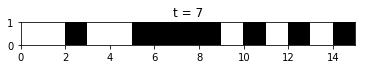

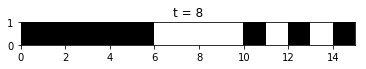

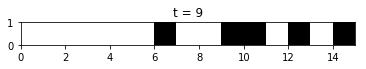

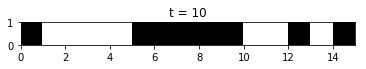

In [2]:
# Run the simulator for 10 steps and show some of the steps.
sim = Rule30(density=0.4)
sim.initialize()

 
for i in range(10):
  sim.step()
  sim.draw()

## Problem 2:


In [3]:
class Rule18(object):
    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 18.
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 1,
        (0, 1, 0): 0,
        (0, 1, 1): 0,
        (1, 0, 0): 1,
        (1, 0, 1): 0,
        (1, 1, 0): 0,
        (1, 1, 1): 0}

    def __init__(self, length=10, density=0.2):
        '''
        Initialize objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton.
           In our case it is 10.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.5.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.length = length
        self.density = density

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

        
    def initialize(self, current_state=np.zeros(10)):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # turn the current state into an array
        self.current_state = np.array(current_state)
        self.time = 0


    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(1, self.length - 1):
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1


sim = Rule18(density=0.2)

# all the finite patterns of the configuration
permutations = list(product([0, 1], repeat=10))

def notGardenofEden():
  '''
  This function outputs:
  * the numbers of configurations that are not Garden of Eden.
  '''
  no_GOE = set()  # Permutations that are not Garden Of Eden configurations

    # loop through each element in permutation
  for permutation in permutations:
      sim.initialize(current_state=permutation) # start for each initial condition
      seen = set() # already seen configurations
        # Stopping conditions:
        #   1. Is this configuration similar to the initial condition?:
        #    YES -> Therefore, it is NOT a Garden of Eden -> Check next permutation
        #    NO -> Not then check the second stopping condition
        #   2. Have we seen this config before (but it is not the init config:)
        #    YES -> We have gone through all config it can go to and thus,
        #          repeated a loop and never saw the initial condition. It is 
        #          a GARDEN OF EDEN configuration
        #    NO -> Go to the next step 
      while True:
          sim.step() 
          if np.array_equal(np.array(permutation), sim.current_state)==True:
            no_GOE.add(permutation) # this is not a Garden of Eden
            break
          if tuple(sim.current_state) in seen: # this is not a Garden of Eden
            break
          seen.add(tuple(sim.current_state))
          no_GOE.add(tuple(sim.current_state)) 
    

  return (len(no_GOE))

    # print(sim, sim.current_state)

# this should output the non - Garden of Eden
print(notGardenofEden())
# this should output the Garden of Eden
print('The number of Garden of Edens in Rule 18 is', 
      len(permutations) - notGardenofEden(),'.') 



216
The number of Garden of Edens in Rule 18 is 808 .


## Problem 3:

[0.0001] [0] [0.9999] 0.333


C:\Users\almag\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  del sys.path[0]
C:\Users\almag\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  app.launch_new_instance()


<function matplotlib.pyplot.show(*args, **kw)>

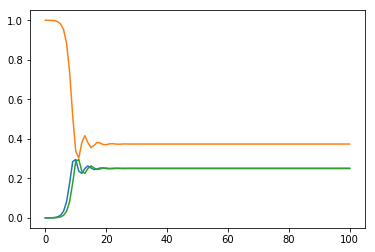

In [19]:
from scipy.misc import comb
import pylab
p1 = [10**(-4)]
r= [0]
q =[1-p1[0]-r[0]]
p = 0.333

print(p1,r,q,p)

for t in range(100):
    # the equation for this problem
    p1.append(
        (1-p1[t] - r[t]) * sum([comb(8,k)*p1[t]**k * (1- p1[t])**(8-k) * (1-(1-p)**k) for k in range (0,8)])
    )
    r.append(p1[t])
    q.append((1-p1[t]-r[t])*(1-sum([comb(8,k)*p1[t]**k*(1-p1[t])**(8-k)*(1-(1-p)**k) for k in range (0,8)])+r[t]))

pylab.plot(range(101), p1)
pylab.plot(range(101), q)
pylab.plot(range(101), r)
pylab.show

The asymptotic behaviour is predicted from the graph above. 

## Problem 4:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

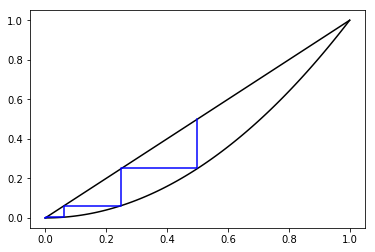

In [24]:
### this code is adapted from Sayama's book
def initialize():
    global x, result
    x = 0.5
    result = [x]

def observe():
    global x, result
    result.append(x)

def f(x):
    return x**2 # the formula plugged in

def update():
    global x, result
    x = f(x)

initialize()
for t in range(30):
    update()
    observe()

### drawing diagonal line
xmin, xmax = 0, 1
plot([xmin, xmax], [xmin, xmax], 'k')

### drawing curve
rng = linspace(xmin, xmax, 101)
plot(rng, [f(x) for x in rng], 'k')

# drawing trajectory
horizontal = [result[0]]
vertical = [result[0]] 
for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)    
plot(horizontal, vertical, 'b')


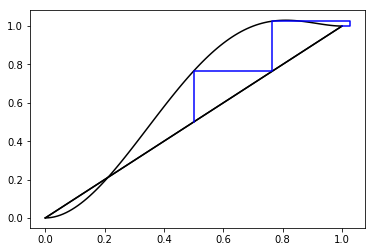

In [31]:
#### attempt to solve the 3-D fire propagation
def initialize():
    global x, result
    x = 0.5
    result = [x]

def observe():
    global x, result
    result.append(x)

def f(x):
    # the new formula
    return (x**6 + 6*x**3*(1-x) + 6*x**2*(1-x)**2)

def update():
    global x, result
    x = f(x)

initialize()
for t in range(30):
    update()
    observe()

### drawing diagonal line
xmin, xmax = 0, 1
plot([xmin, xmax], [xmin, xmax], 'k')

### drawing curve

### drawing diagonal line
xmin, xmax = 0, 1
plot([xmin, xmax], [xmin, xmax], 'k')

### drawing curve
rng = linspace(xmin, xmax, 101)
plot(rng, [f(x) for x in rng], 'k')

### drawing trajectory
horizontal = [result[0]]
vertical = [result[0]] 
for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)    
plot(horizontal, vertical, 'b')

show()

The critical point (percolation threshold) is at pc=0,1. That means that either the forest will not burn at all or it will burn completely. That makes sense, as we think of it like dominoes (since it is 1-D). If one domino falls, then all the dominoes will fall.

I was not able to create a cobweb plot for the 3-D fire propagation, with 100% certainty.
However, my process of thinking is that the formula should be 6*(2x2) formula, as I was comparing it to the the mathematical formula for cubic surface. Following my logic, the guess for the critical point should be pc = 0, 0.2, 1 for 3-D area.